In [37]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import lambertw
from numpy import exp, log, e
%matplotlib inline

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import lambertw
from numpy import exp, e
from tqdm import tqdm


def lambertDecay(t, tau, sigma_12, sigma_21, n, n20, r, rho, d):

    B = 1 + ((1+r/2)*rho*d*sigma_12*n)
    A = ((1+r/2))*rho*d*(sigma_12+sigma_21) / B

    arg = -A*n20*exp(-(t/(B*tau))-(A*n20))

    # Check that result is real
    assert min(arg) >= -1/e, \
        'Lambert W Argument will give an imaginary result.'

    return -lambertw(arg).real/A

In [55]:
# Time to simulate over
t = np.linspace(0, 200, 100)

# Define parameters
tau = 10            # Radiative decay rate
rho = 1             # Density of Er ions (*1E21 cm^-2)
d = 1E-4            # Thickness of slab (cm)

# DOI: 10.1063/1.366265
sigma_12 = 4.1      # Absorption cross-section (*1E-21 cm^2)
sigma_21 = 5        # Emission cross-section (*1E-21 cm^2)

n = 1           # Total number of excited ions

r = 0.1             # Reflectivity of top layer
n20 = 0.8     # Number of excited ions at t=0

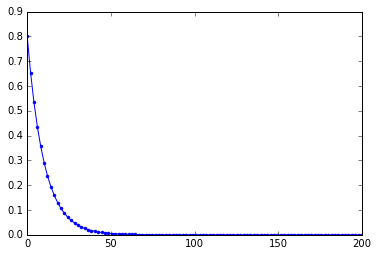

In [63]:
plt.plot(t,lambertDecay(t, tau, sigma_12, sigma_21, n, n20, r, rho, d),'.-')

In [36]:
B*tau

8.404999999999999e+18

In [19]:
9.98863823e-001

0.998863823

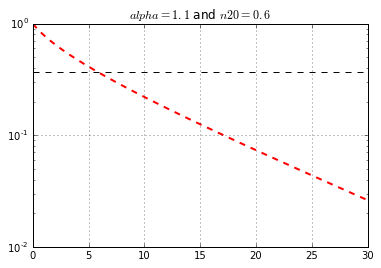

In [4]:
from ipywidgets import interact

def plt_arrays(x, y, title="", color="red", linestyle="dashed", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x,y, color=color, linestyle=linestyle, linewidth=linewidth)
    axes.set_title(title)
    axes.grid()
    plt.axhline(1/np.e, ls='--', color='k')
    plt.xlim(0,30)
    plt.yscale('log')
    plt.show()
    
def f(alpha, n20, **kwargs):
    t = np.linspace(0,30,500)
    tau = 10
    sigma_21 = 1
    n = lambertDecay(t, alpha, tau, sigma_21, n20)
    
    title="$alpha = %s$ and $n20 = %s$" % (alpha,n20)
    
    plt_arrays(t,n/max(n), title=title, **kwargs)
    
#Define Constants
alpha=0.25
n20=0.7

f(alpha, n20)

i = interact(f,
             alpha=(0.1,10.),
             n20=(0.5,1),
#              color = ["red", "blue", "green"],
#              linestyle=["solid", "dashed"],
#              linewidth=(1,5)
             )